# Clustering en Apprentissage Non Supervisé

Dans les formations précédentes, on a exploré le Deep Learning et l'apprentissage supervisé. Cependant, en Machine Learning, il existe d'autres types d'apprentissage, notamment l'apprentissage non supervisé. Dans ce TP, on va se concentrer sur le **clustering**, une technique clé de l'apprentissage non supervisé.

## Introduction au Clustering

Le clustering est une méthode utilisée pour segmenter un ensemble de données en groupes, où les éléments de chaque groupe sont plus similaires entre eux qu'avec ceux d'autres groupes. C'est utile dans de nombreux domaines, comme le marketing, la biologie, ou le traitement d'image.

![Clustering](https://raw.githubusercontent.com/Automatants/projets-de-permanence/master/image-hosting/clustering/clustering.jpeg)

## Algorithmes de Clustering

Il existe plusieurs algorithmes de clustering. On va explorer tout d'abord le K-Means.

### K-Means

Le K-Means est un algorithme populaire et simple. Il partitionne l'ensemble de données en K clusters, où K est un paramètre qu'on doit définir.

#### Fonctionnement de K-Means

1. Sélectionner K points comme centres de clusters initiaux.
2. Attribuer chaque point au centre le plus proche.
3. Mettre à jour les centres de clusters en calculant la moyenne des points attribués à chaque cluster.
4. Répéter les étapes 2 et 3 jusqu'à convergence.

## Implémentation

Nous allons utiliser la bibliothèque `scikit-learn` pour implémenter K-Means sur un dataset qu'on va générer.


### Génération du dataset
Tout d'abord, on va générer des points 2D aléatoires et en utilisant la fonction `make_blobs` de `scikit-learn`. Cette fonction génère des clusters de points centrés autour de centres aléatoires. Chaque point est associé à un label, qui correspond au cluster auquel il appartient.
Dans notre cas, on va générer 1000 points répartis en 4 clusters, avec un écart-type de 0.6.

(1000, 2)
(1000,)


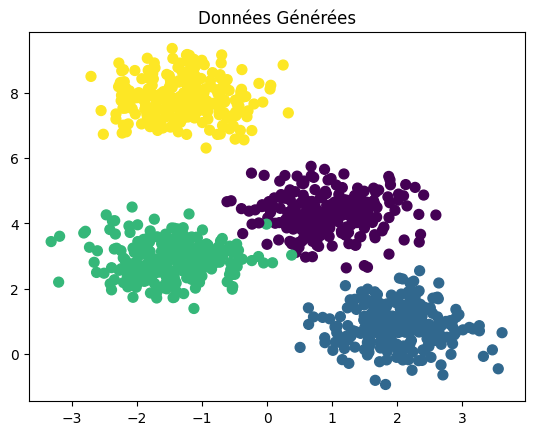

In [5]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=1000, centers=4, cluster_std=0.60, random_state=0)

print(X.shape)
print(y.shape)

# Visualiser les données
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='viridis')
plt.title('Données Générées')
plt.show()

### Implémentation de K-Means
On va maintenant implémenter K-Means en utilisant la bibliothèque `scikit-learn`. On va commencer par importer la classe `KMeans` de `sklearn.cluster`.

(1000,)


/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


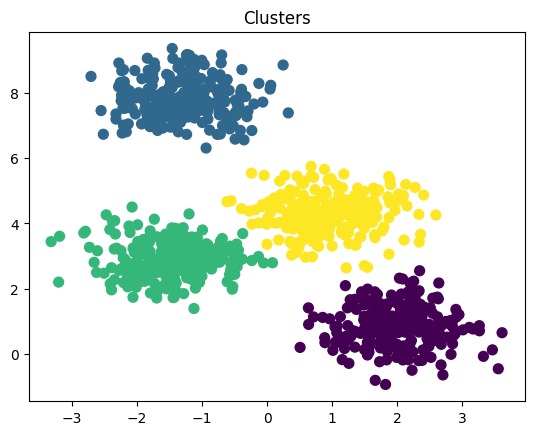

In [6]:
from sklearn.cluster import KMeans

# Créer une instance de KMeans pour 4 clusters
kmeans = KMeans(n_clusters=4)

# Entraîner le modèle sur les données
kmeans.fit(X)

# Prédire les clusters pour chaque point
y_pred = kmeans.predict(X)
print(y_pred.shape)

# Visualiser les clusters
plt.scatter(X[:,0], X[:,1], c=y_pred, s=50, cmap='viridis')
plt.title('Clusters')
plt.show()

### Remarque
Ici, on connait le nombre de clusters à l'avance, mais en pratique, ce n'est pas toujours le cas. On peut utiliser la méthode du coude pour déterminer le nombre optimal de clusters. Cette méthode consiste à calculer la somme des distances au carré entre chaque point et le centre de son cluster. On calcule cette somme pour différents nombres de clusters, et on choisit le nombre de clusters où la somme des distances commence à diminuer de manière linéaire.

## Application à MNIST
On va maintenant appliquer K-Means à MNIST. On va commencer par importer les données.

In [ ]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Charger les données
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

# Extraire les images et les labels
X_train = mnist_trainset.data.numpy()
y_train = mnist_trainset.targets.numpy()

X_test = mnist_testset.data.numpy()
y_test = mnist_testset.targets.numpy()

print(X_train.shape)
print(y_train.shape)

### Prétraitement des données
On va maintenant prétraiter les données. Kmeans est un algorithme qui calcule des distances entre les points (ou vecteurs). Ici, on a des images, qui sont des matrices de pixels. On va donc transformer chaque image en un vecteur de pixels.
On va alors commencer par redimensionner les images en vecteurs de taille 784. Ensuite, on va normaliser les données en divisant chaque valeur par 255.

In [ ]:
# Redimensionner les images en vecteurs
X_train_flattened = ...
X_test_flattened = ...

# Normaliser les données
X_train_normalized = ...
X_test_normalized = ...

### Entraînement du modèle
On va maintenant entraîner le modèle sur les données.

In [ ]:
# Créer une instance de KMeans pour 10 clusters
kmeans = ...

# Entraîner le modèle sur les données
...

# Prédire les clusters pour chaque point
y_pred = ...
print(y_pred.shape)

Maintenant, on aimerait calculer l'accuracy de notre modèle, mais on ne connait pas les labels des clusters. On va donc utiliser la méthode suivante : pour chaque cluster, on va compter le nombre d'occurences de chaque label, et on va associer à ce cluster le label qui a le plus d'occurences.

In [ ]:
...

### Calcul de l'accuracy sur les données de test
On va maintenant calculer l'accuracy de notre modèle sur les données de test.

In [ ]:
# Prédire les clusters pour les données de test
y_pred_test = ...

# Calculer l'accuracy
...

## Amélioration de l'accuracy
On a obtenu une accuracy de 0.55, ce qui est assez faible. On va essayer d'améliorer cette accuracy.
Vous pouvez remarquer qu'on n'est pas obligé de mettre 10 clusters. On peut mettre un nombre plus grand, et ensuite associer à chaque cluster le label qui a le plus d'occurences. Vous pouvez donc essayer de mettre un nombre plus grand de clusters, et voir si ça améliore l'accuracy.